## Example notebook for the ATOM pipeline
---------------------------------

Load the Australian Weather dataset from Kaggle at https://www.kaggle.com/jsphyg/weather-dataset-rattle-package.

In [1]:
# Import packages
import numpy as np
import pandas as pd
from atom import ATOM

In [5]:
# Load the Australian weather dataset as a pandas dataframe
# Make sure to have the file 'weatherAUS.csv' in the same directory as your notebook

X = pd.read_csv('weatherAUS.csv')
Y = X['RainTomorrow']  # Target feature
X = X.drop('RISK_MM', axis=1)  # Feature directly related to the target
X = X.drop('RainTomorrow', axis=1)

In [7]:
# Run ATOM pipeline
atom = ATOM(models=['MNB', 'LogReg', 'RF', 'lSVM'],
            metric="accuracy",
            impute='median',
            features=None,
            ratio=0.3,
            max_iter=1,
            max_time=np.inf,
            eps=1e-08,
            batch_size=1,
            init_points=5,
            plot_bo=False,
            cv=True,
            n_splits=4,
            log=None,
            n_jobs=1,
            verbose=1)

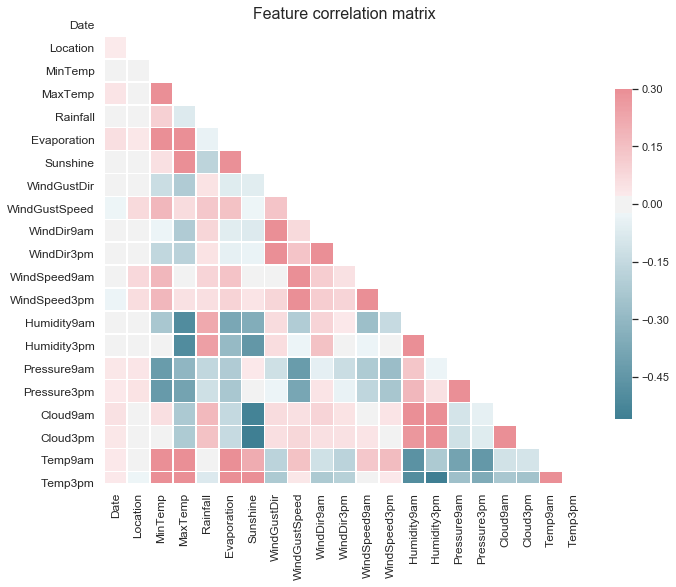

In [8]:
atom.plot_correlation(X)

In [9]:
atom.fit(X, Y, percentage=3)


<================ ATOM ================>

Algorithm set to binary classification.
Models in pipeline: ['MNB', 'LogReg', 'RF', 'lSVM']


Running pipeline =====================>


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.46s/it]




Final stats ================>>
Total duration: 00h:00m:11s
Target metric: Accuracy
------------------------------------
Logistic Regression           --> 0.830 ± 0.006
Random Forest                 --> 0.831 ± 0.010 !!
Linear Support Vector Machine --> 0.831 ± 0.005


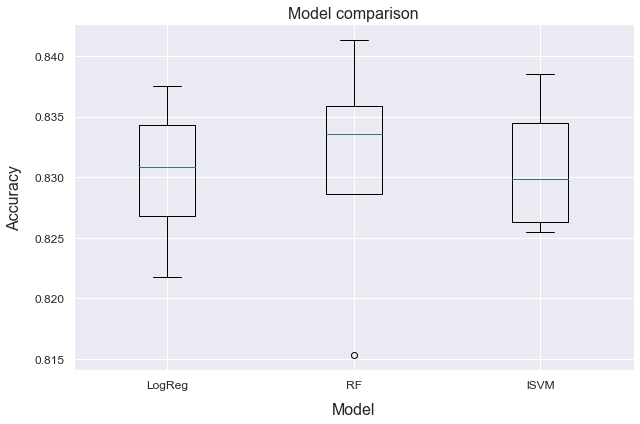

In [10]:
atom.boxplot()

In [11]:
atom.LogReg.best_params

{'max_iter': 182, 'C': 1.7, 'penalty': 'l1'}

In [12]:
atom.MNB.error

'ValueError: Input X must be non-negative'

In [13]:
atom.RF.best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=16, min_samples_split=18,
                       min_weight_fraction_leaf=0.0, n_estimators=26,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
atom.LogReg.Precision()

0.6818181818181818

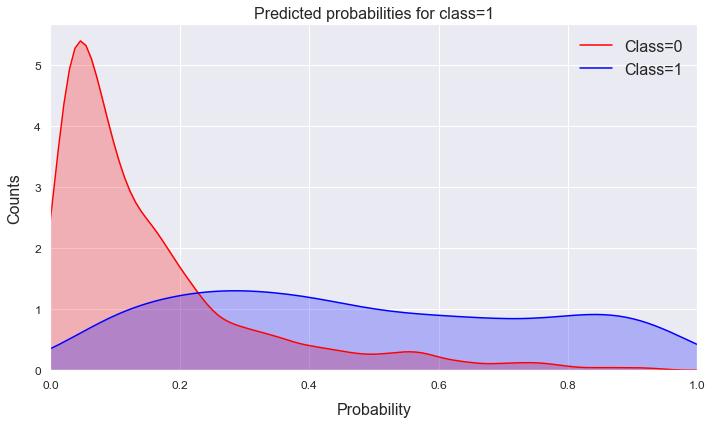

In [15]:
atom.lSVM.plot_probabilities()

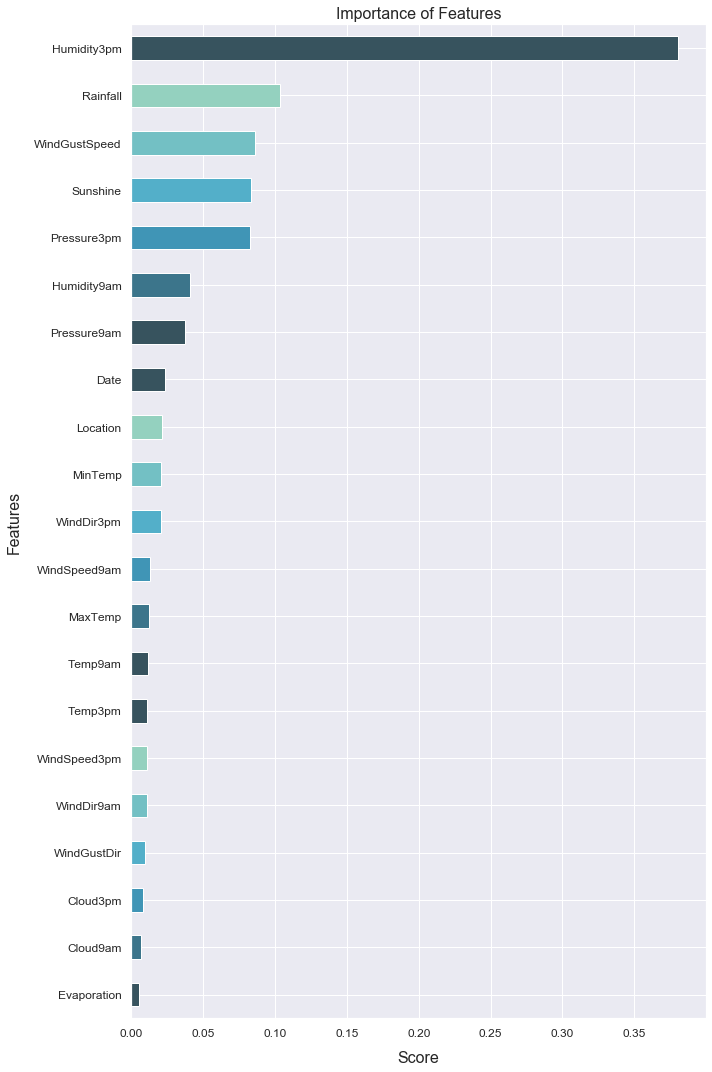

In [16]:
atom.RF.plot_feature_importance()

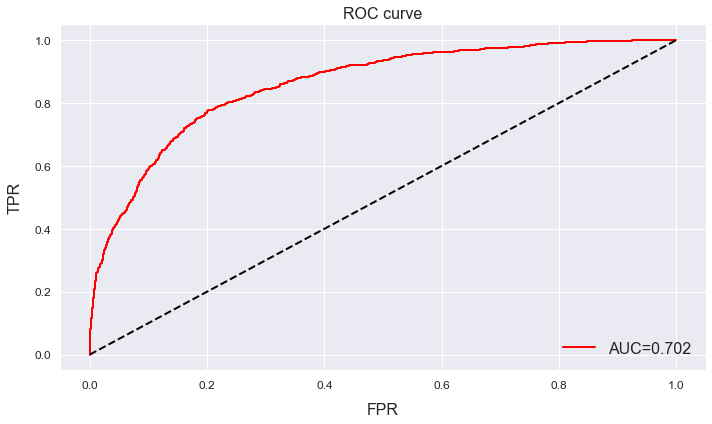

In [17]:
atom.LogReg.plot_ROC()

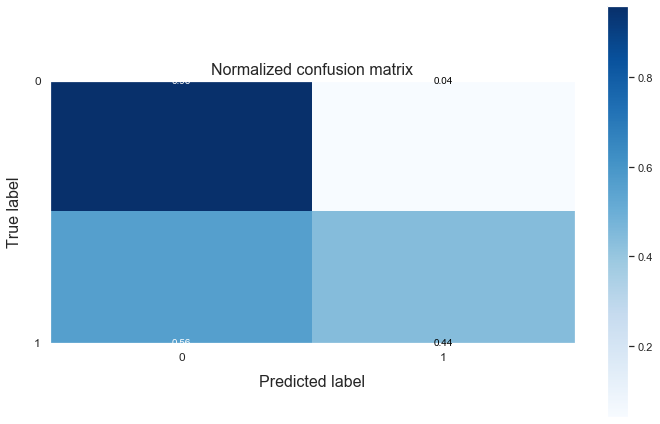

In [18]:
atom.RF.plot_confusion_matrix()

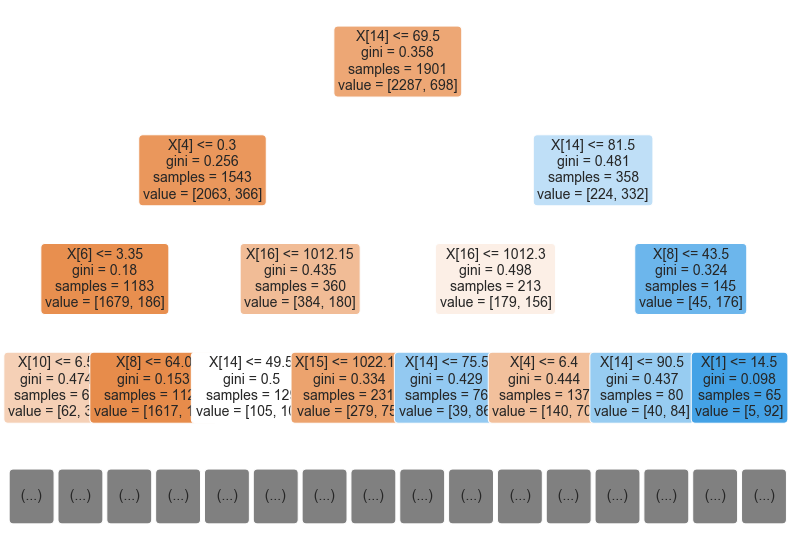

In [19]:
atom.RF.plot_decision_tree(0, max_depth=3, rotate=False)

## Alternatively, the data cleaning methods can be called independently of the fit method to further tune specific parameters.

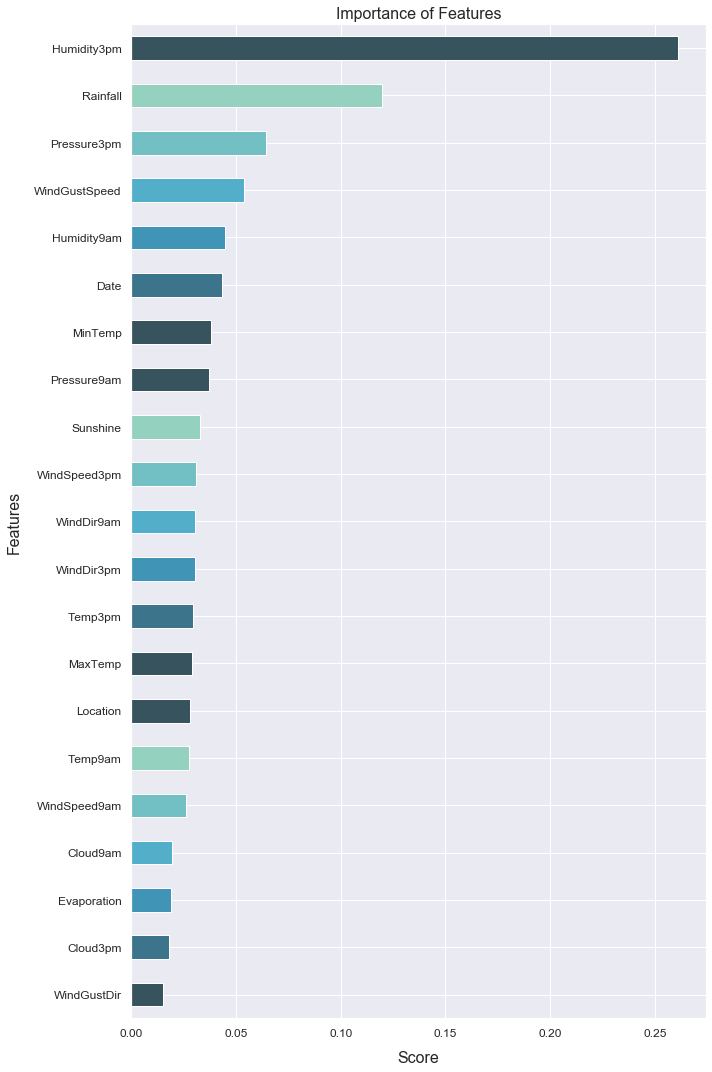

In [20]:
atom = ATOM('RF', max_iter=1, cv=False)
atom.fit(X, Y, percentage=0.5)
atom.rf.plot_feature_importance()

In [21]:
aml = ATOM(models=['LogReg', 'LDA'],
           metric="f1",
           max_iter=2,
           init_points=1,
           verbose=3)

X = aml.imputer(X, strategy='mean',
                max_frac_missing=0.5,
                missing=[np.inf, -np.inf, '', '?', 'NA', 'nan', 'NaN', None])
X = aml.encoder(X, max_number_onehot=10)
X = aml.feature_selection(X, Y,
                          strategy=atom.RF.best_model,
                          max_features=None,
                          threshold=0.025,
                          frac_variance=1,
                          max_correlation=0.98)
aml.fit(X, Y, percentage=1)

Imputing missing values...
Encoding categorical features...
Performing feature selection...
 --> Feature Evaporation was removed by the recursive feature eliminator.
 --> Feature WindGustDir was removed by the recursive feature eliminator.
 --> Feature Cloud9am was removed by the recursive feature eliminator.
 --> Feature Cloud3pm was removed by the recursive feature eliminator.

<================ ATOM ================>

Algorithm set to binary classification.
Models in pipeline: ['LogReg', 'LDA']

Data preprocessing =============>
Checking feature types...
Imputing missing values...
Encoding categorical features...
Scaling data...

Data stats =====================>
Number of features: 17
Number of instances: 1421
Size of the training set: 994
Size of the validation set: 427
Number of instances per target class:
RainTomorrow --> Count
No           --> 1077
Yes          --> 344


Running pipeline =====================>


Running BO for Logistic Regression...
Parameters --> {'max_iter': 